In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('VIX_data.csv',index_col="Date")
data.index = pd.to_datetime(data.index)
data_clean = data
data_clean.fillna(data_clean.mean(), inplace=True)

In [3]:
# Create a new column for difference between high and low for each index
indexes = ['DJI', 'NASDAQ', 'GOLD', 'OIL', 'FTSE', 'NIKKEI', 'RUSSELL2000']
for index in indexes:
    data_clean[index+' High Minus Low'] = data_clean[index+' High'] - data_clean[index+' Low']
# Remove all open and close prices
data_clean = data_clean.drop(columns=['DJI Open', 'DJI Close', 'NASDAQ Open', 'NASDAQ Close', 'GOLD Open', 'GOLD Close', 'OIL Open', 'OIL Close', 'FTSE Open', 'FTSE Close', 'NIKKEI Open', 'NIKKEI Close', 'RUSSELL2000 Open', 'RUSSELL2000 Close'])

In [4]:
data_clean

,Unemployment Rate,CPI,Three Month T Bill Rate,Six Month T Bill Rate,10-Year Treasury Constant Maturity Rate,Fed Rate,BBB Rate,SP500 Index,VIX,GDP,...,OIL Low,OIL Adj Close,OIL Volume,DJI High Minus Low,NASDAQ High Minus Low,GOLD High Minus Low,OIL High Minus Low,FTSE High Minus Low,NIKKEI High Minus Low,RUSSELL2000 High Minus Low
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-01,5.7,237.430,0.02,0.05,2.30,0.09,3.50,2006.350,16.530,17912.079,...,241.279999,245.039993,22051206,1540.418945,524.909668,8.839996,38.559998,550.099609,2004.879883,133.859985
2014-11-01,5.8,236.983,0.02,0.07,2.33,0.09,3.63,2039.820,13.330,17912.079,...,203.679993,204.639999,26087667,616.470703,215.939941,6.290001,42.080002,328.200195,807.169922,39.780029
2014-12-01,5.6,236.252,0.03,0.11,2.21,0.12,3.78,2063.890,15.155,17912.079,...,158.720001,162.880005,60335993,1035.859375,267.640137,6.579994,52.399994,608.500000,1357.890625,86.929932
2015-01-01,5.7,234.747,0.03,0.08,1.88,0.11,3.64,2024.465,19.455,18063.529,...,130.399994,142.559998,83013319,815.478516,213.899902,13.260002,32.400009,566.799805,1258.019531,61.500000
2015-02-01,5.5,235.342,0.02,0.07,1.98,0.11,3.65,2096.990,15.450,18063.529,...,140.639999,144.800003,93894742,1206.621094,408.790039,8.870003,21.680008,235.200195,1593.521484,85.880005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,4.0,313.225,5.25,5.17,4.48,5.33,5.75,5256.815,12.920,29016.714,...,73.879997,74.820000,63365200,2296.859375,1475.020508,14.949997,4.500000,363.000488,1820.160156,144.290039
2024-06-01,4.1,313.049,5.24,5.15,4.31,5.33,5.63,5433.740,12.645,29016.714,...,70.440002,79.589996,41372900,1324.011719,1388.570312,8.430008,9.599998,258.800293,1838.429688,95.300049
2024-07-01,4.3,313.534,5.20,5.01,4.25,5.33,5.53,5550.165,13.190,29016.714,...,74.000000,77.739998,49747700,2338.058594,1655.689453,15.159988,8.599998,343.900391,4815.578125,280.939941


In [5]:
explanatory_vars = data_clean.drop(columns=['VIX'])
y_entire = data_clean['VIX']

In [6]:
explanatory_vars

,Unemployment Rate,CPI,Three Month T Bill Rate,Six Month T Bill Rate,10-Year Treasury Constant Maturity Rate,Fed Rate,BBB Rate,SP500 Index,GDP,Initial Claims,...,OIL Low,OIL Adj Close,OIL Volume,DJI High Minus Low,NASDAQ High Minus Low,GOLD High Minus Low,OIL High Minus Low,FTSE High Minus Low,NIKKEI High Minus Low,RUSSELL2000 High Minus Low
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-01,5.7,237.430,0.02,0.05,2.30,0.09,3.50,2006.350,17912.079,1155000,...,241.279999,245.039993,22051206,1540.418945,524.909668,8.839996,38.559998,550.099609,2004.879883,133.859985
2014-11-01,5.8,236.983,0.02,0.07,2.33,0.09,3.63,2039.820,17912.079,1458000,...,203.679993,204.639999,26087667,616.470703,215.939941,6.290001,42.080002,328.200195,807.169922,39.780029
2014-12-01,5.6,236.252,0.03,0.11,2.21,0.12,3.78,2063.890,17912.079,1138000,...,158.720001,162.880005,60335993,1035.859375,267.640137,6.579994,52.399994,608.500000,1357.890625,86.929932
2015-01-01,5.7,234.747,0.03,0.08,1.88,0.11,3.64,2024.465,18063.529,1438000,...,130.399994,142.559998,83013319,815.478516,213.899902,13.260002,32.400009,566.799805,1258.019531,61.500000
2015-02-01,5.5,235.342,0.02,0.07,1.98,0.11,3.65,2096.990,18063.529,1205000,...,140.639999,144.800003,93894742,1206.621094,408.790039,8.870003,21.680008,235.200195,1593.521484,85.880005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,4.0,313.225,5.25,5.17,4.48,5.33,5.75,5256.815,29016.714,892000,...,73.879997,74.820000,63365200,2296.859375,1475.020508,14.949997,4.500000,363.000488,1820.160156,144.290039
2024-06-01,4.1,313.049,5.24,5.15,4.31,5.33,5.63,5433.740,29016.714,1184000,...,70.440002,79.589996,41372900,1324.011719,1388.570312,8.430008,9.599998,258.800293,1838.429688,95.300049
2024-07-01,4.3,313.534,5.20,5.01,4.25,5.33,5.53,5550.165,29016.714,953000,...,74.000000,77.739998,49747700,2338.058594,1655.689453,15.159988,8.599998,343.900391,4815.578125,280.939941


# Unlagged

In [7]:
# Split the data into training and testing sets first
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(explanatory_vars, y_entire, test_size=0.1, shuffle=False)

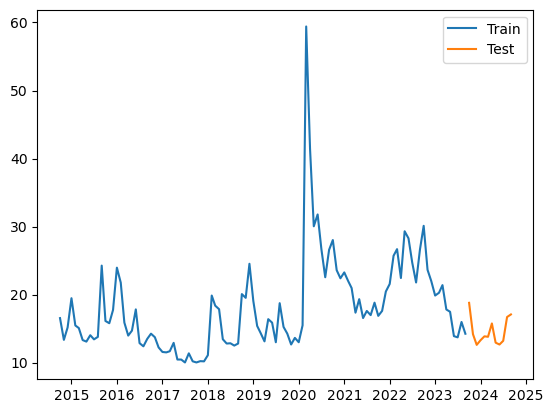

In [8]:
# Plot test and train data 
plt.plot(y_train_full, label='Train')
plt.plot(y_test_full, label='Test')
plt.legend()
plt.show()


In [9]:
all_feature_names = list(X_train_full.columns)
best_features = []
best_rmse = float('inf')
remaining_features = all_feature_names.copy()

In [10]:
# Algorithm to determine feature combination that gives the best RMSE
while len(remaining_features) > 0:
    for feature in remaining_features:
        current_features = best_features.copy()
        current_features.append(feature)
        X_train, X_opt, y_train, y_opt = train_test_split(X_train_full[current_features], y_train_full, test_size=0.111111, shuffle=False)
        model = RandomForestRegressor(n_estimators=500, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_opt)
        rmse = root_mean_squared_error(y_opt, y_pred)
        if rmse < best_rmse:
            best_rmse = rmse
            best_features = current_features
    remaining_features.remove(feature)

In [11]:
X_train, X_opt, y_train, y_opt = train_test_split(X_train_full[current_features], y_train_full, test_size=0.111111, shuffle=False)

In [12]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomForestRegressor and GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, 
                           scoring='neg_root_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Extract the best model and parameters
best_rf = grid_search.best_estimator_
optimized_params = grid_search.best_params_

# Make predictions and calculate performance metrics
y_pred = best_rf.predict(X_opt)
rmse = root_mean_squared_error(y_opt, y_pred)
mae = mean_absolute_error(y_opt, y_pred)
r2 = r2_score(y_opt, y_pred)

print("Optimized Parameters:", optimized_params)
print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

Optimized Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
RMSE: 2.2738, MAE: 2.0381, R²: 0.7530


In [13]:
X = X_train_full[best_features]
y = y_train_full

In [14]:
rf_model = RandomForestRegressor(n_estimators=optimized_params['n_estimators'], bootstrap=optimized_params['bootstrap'], max_depth=optimized_params['max_depth'], min_samples_split=optimized_params['min_samples_split'], min_samples_leaf=optimized_params['min_samples_leaf'], random_state=42)
rf_model.fit(X, y)

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=500,
                      random_state=42)

In [15]:
y_pred = rf_model.predict(X_test_full[best_features])
# Calculate RMSE
rmse = root_mean_squared_error(y_test_full, y_pred)
# Calculate MAPE
mape = np.mean(np.abs((y_test_full - y_pred) / y_test_full)) * 100
# Calculate R²
r2 = r2_score(y_test_full, y_pred)
# Calculate Directional Accuracy
directional_accuracy = np.mean(np.sign(y_test_full.diff().dropna()) == np.sign(pd.Series(y_pred, index=y_test_full.index).diff().dropna())) * 100

print(f"RMSE: {rmse:.4f}, MAPE: {mape:.4f}%, R²: {r2:.4f}, Directional Accuracy: {directional_accuracy:.4f}%")

RMSE: 3.7274, MAPE: 23.8810%, R²: -2.7047, Directional Accuracy: 54.5455%


In [16]:
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

In [17]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

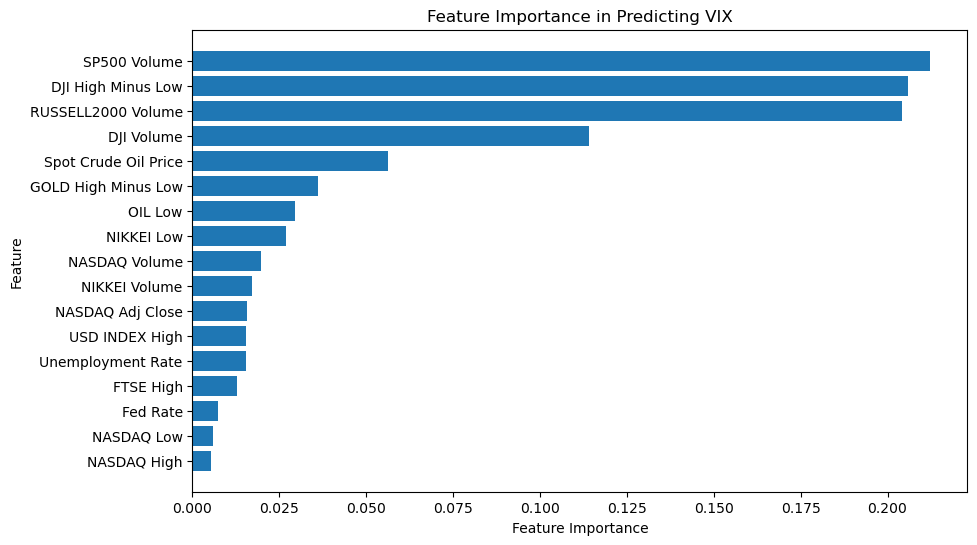

In [18]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting VIX')
plt.gca().invert_yaxis()
plt.show()

In [19]:
# Add dates back to predictions
y_pred_df = pd.DataFrame(y_pred, index=X_test_full.index, columns=['VIX Prediction'])
y_test_df = pd.DataFrame(y_test_full, index=X_test_full.index, columns=['VIX'])

In [20]:
y_pred_df

,VIX Prediction
Date,
2023-10-01,17.544626
2023-11-01,19.586799
2023-12-01,15.622318
2024-01-01,15.399109
2024-02-01,15.633036
2024-03-01,16.637568
2024-04-01,19.138708
2024-05-01,19.232839
2024-06-01,14.845940


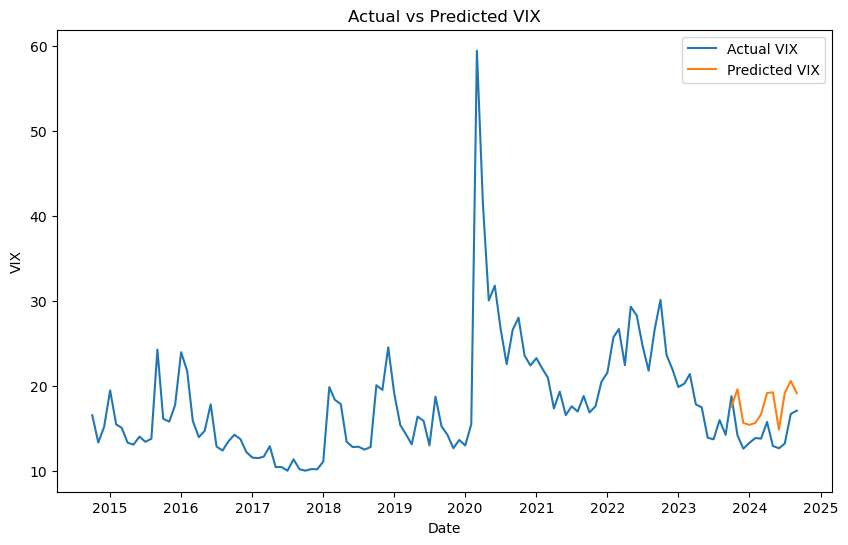

In [21]:
# Plot the actual VIX for the entire time series and the predicted VIX for the test set
plt.figure(figsize=(10, 6))
plt.title('Actual vs Predicted VIX')
plt.xlabel('Date')
plt.ylabel('VIX')
plt.plot(y_entire, label='Actual VIX')
plt.plot(y_pred_df.index, y_pred_df['VIX Prediction'], label='Predicted VIX')
plt.legend()
plt.show()



In [22]:
# Combine Data Frame of Predictions and Actual VIX
combined = pd.concat([y_test_df, y_pred_df], axis=1)
combined

,VIX,VIX Prediction
Date,,
2023-10-01,18.775,17.544626
2023-11-01,14.165,19.586799
2023-12-01,12.595,15.622318
2024-01-01,13.280,15.399109
2024-02-01,13.850,15.633036
2024-03-01,13.785,16.637568
2024-04-01,15.745,19.138708
2024-05-01,12.920,19.232839
2024-06-01,12.645,14.845940
